In [218]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='darkgrid', context='talk')

import warnings
warnings.filterwarnings('ignore')

In [109]:
orders=pd.read_csv('orders.csv', sep=';', low_memory=False)
orders.head()

,order_id,date,payment,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
0,1900052301,2019-06-04 00:00:00,Dobírka,ZB00025746,1,9.412096,0.000000,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
1,1900052301,2019-06-04 00:00:00,Dobírka,ZB00022010,1,12.784729,4.087597,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
2,1900052301,2019-06-04 00:00:00,Dobírka,ZB00004531,1,8.524561,0.231008,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
3,1900052301,2019-06-04 00:00:00,Dobírka,ZB00011355,1,6.747378,2.158140,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
4,1900073403,2019-06-04 00:00:00,Dobírka,ZB00025748,1,88.378682,0.000000,0.0,E-COMMER,FTB.czC,VO_B_FTO,11teamsports.cz,2019-06-04 09:22:00


In [110]:
orders.shape

(1420929, 13)

In [111]:
items_df=pd.read_csv('items.csv', sep=';')
items_df.head()

,item_code,item_name,style,brand_id,name,teamsales,group0_id,group0,group1_id,group1,group2_id,group2,group3_id,group3,group4_id,group4,category,CodeBars
0,S101,Dopravné,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S101
1,S102,Potisk,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S102
2,S103,Marketingová podpora,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S103
3,S104,Vltava Run,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S104
4,S105,Služby - vnitro,NaN,-1,- žádný výrobce -,N,999.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S105


In [112]:
items_df.shape

(228152, 18)

In [113]:
items_df.isnull().sum()

item_code         0
item_name      2037
style          8331
brand_id          0
name              0
teamsales         0
group0_id        18
group0         2419
group1_id      8870
group1        26700
group2_id      8870
group2       173437
group3_id      8870
group3       228152
group4_id      8870
group4       228152
category      24895
CodeBars         34
dtype: int64

In [114]:
orders.isnull().sum()

order_id                1829
date                       0
payment                 3225
item_code                  0
quantity                   0
unit_price_vat_excl        0
unit_cogs                  0
unit_rrp_vat_excl      11467
department                 0
channel                    0
owner                      0
site                       0
CreatedAt                  0
dtype: int64

In [115]:
orders['site'].value_counts()

11teamsports.cz     282889
11teamsports.sk     143533
top4running.cz      137627
11teamsports.hu     128277
11teamsports.ro     127018
top4running.sk       59050
top4running.de       54682
top4running.hu       51582
Other                41810
top4running.es       37706
top4fitness.cz       36785
top4fitness.sk       35220
top4sport.cz         30990
top4running.ro       26412
top4running.fr       22790
top4football.es      22679
top4fitness.hu       20173
top4fitness.ro       17525
top4running.com      15086
top4football.fr      14070
top4football.de      12788
11teamsports.hr      12093
top4fitness.de       11134
top4fitness.es       11130
top4running.it       10832
top4street.cz        10541
top4football.com      9172
top4football.it       5704
top4running.at        5606
top4street.hu         5083
top4street.sk         3851
top4fitness.fr        3780
top4running.hr        3515
top4fitness.com       3000
top4street.ro         2710
top4fitness.it        2373
top4fitness.hr         971
t

In [116]:
orders.head()

,order_id,date,payment,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,channel,owner,site,CreatedAt
0,1900052301,2019-06-04 00:00:00,Dobírka,ZB00025746,1,9.412096,0.000000,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
1,1900052301,2019-06-04 00:00:00,Dobírka,ZB00022010,1,12.784729,4.087597,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
2,1900052301,2019-06-04 00:00:00,Dobírka,ZB00004531,1,8.524561,0.231008,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
3,1900052301,2019-06-04 00:00:00,Dobírka,ZB00011355,1,6.747378,2.158140,0.0,E-COMMER,FTB.roC,FTB.roO,11teamsports.ro,2019-06-04 09:22:00
4,1900073403,2019-06-04 00:00:00,Dobírka,ZB00025748,1,88.378682,0.000000,0.0,E-COMMER,FTB.czC,VO_B_FTO,11teamsports.cz,2019-06-04 09:22:00


In [159]:
# Preparing the datasets for EDA and time series analysis and combining them into one dataset
def process(orders, items_df):
    orders['date']=pd.to_datetime(orders['date'])#converting it to standard datetime format
    orders['order_id']=orders['order_id'].astype(str) #converting it str in order to be readable
    orders['net_revenue'] = orders.quantity * orders.unit_price_vat_excl
    orders['gross_revenue'] = orders.quantity * orders.unit_cogs
    orders['margin_revenue'] = orders.quantity * (orders.unit_price_vat_excl - orders.unit_cogs)
    orders.drop(orders[orders['site']=='Other'].index, inplace=True) #dropping rows that have Other and i am not sure which country do they belong to
    orders['country']=orders['site'].apply(lambda x: x.split('.')[1]) #Extracting the domains names to find out which coutry the website belongs to and creating a new colum for country names
    orders.drop(orders[orders['country']=='com'].index, inplace=True)# #dropping rows that have .com in the country column because i am not sure which country do they belong to. Besides, there is small number of rows with this domain name.
    orders['country']=orders['country'].replace({'hr': 'Croatia', 'cz':'Czech Republic', 'it': 'Italy', 'ro':'Romania', 'sk':'Slovakia', 'fr':'France', 'de':'Germany', 'es':'Spain', 'hu':'Hungary', 'at':'Austria'}) # Renaming the values taken from domain with the country names
    orders=orders.drop(['payment','unit_rrp_vat_excl', 'department', 'channel', 'owner', 'site', 'CreatedAt'], axis=1)# dropping the columns as I was instructed by the head of corriculum
    
    # Cleaning items_df dataset
    items=items_df[['item_code', 'item_name', 'style', 'name', 'group0', 'group1', 'category']] # taking only necessary variables. Groups 3 and 4 have a lot missing values and can't be used in this project.
    
    final_df=pd.merge(orders, items, on='item_code',)
    return final_df
    
   

In [160]:
data=process(orders, items_df)

In [161]:
data.head()

,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
0,1900052301,2019-06-04,ZB00025746,1,9.412096,0.000000,9.412096,0.000000,9.412096,Romania,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
1,1900100835,2019-07-15,ZB00025746,1,8.648837,5.393411,8.648837,5.393411,3.255426,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
2,1900106577,2019-07-24,ZB00025746,1,8.648837,5.458527,8.648837,5.458527,3.190310,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
3,1900111398,2019-08-01,ZB00025746,1,8.648837,5.440310,8.648837,5.440310,3.208527,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
4,1900052301,2019-06-04,ZB00022010,1,12.784729,4.087597,12.784729,4.087597,8.697132,Romania,NK MERC LT GRD,sp2120-703,Nike,Equipment,Guards,football


In [162]:
data.shape

(1351861, 16)

In [163]:
data.isnull().sum()

order_id                    0
date                        0
item_code                   0
quantity                    0
unit_price_vat_excl         0
unit_cogs                   0
net_revenue                 0
gross_revenue               0
margin_revenue              0
country                     0
item_name                 265
style                  498526
name                        0
group0                    775
group1                 513825
category               502909
dtype: int64

In [164]:
data['item_name'].value_counts()

Dopravné                                     270119
Platba                                       216558
Sleva                                         11419
NIKE AIR ZOOM PEGASUS 37                       5609
M NP SHORT                                     5066
                                              ...  
Puma Smash v2                                     1
Under Armour AF Graphic                           1
Holbrook Matte Black w/ PRIZM Violet              1
LUMBAR PACK                                       1
nike acay 16 midlayer zip sweatshirt kids         1
Name: item_name, Length: 20826, dtype: int64

In [165]:
data['group0'].value_counts()

Other        498476
Apparel      429844
Footwear     325211
Equipment     95732
Nutrition      1679
Services        144
Name: group0, dtype: int64

In [166]:
data['item_name'].replace(np.nan, 'Dopravné', inplace=True)
data['group0'].replace(np.nan, 'Other', inplace=True)

In [171]:
data.isnull().sum()

order_id                    0
date                        0
item_code                   0
quantity                    0
unit_price_vat_excl         0
unit_cogs                   0
net_revenue                 0
gross_revenue               0
margin_revenue              0
country                     0
item_name                   0
style                  498526
name                        0
group0                      0
group1                 513825
category               502909
dtype: int64

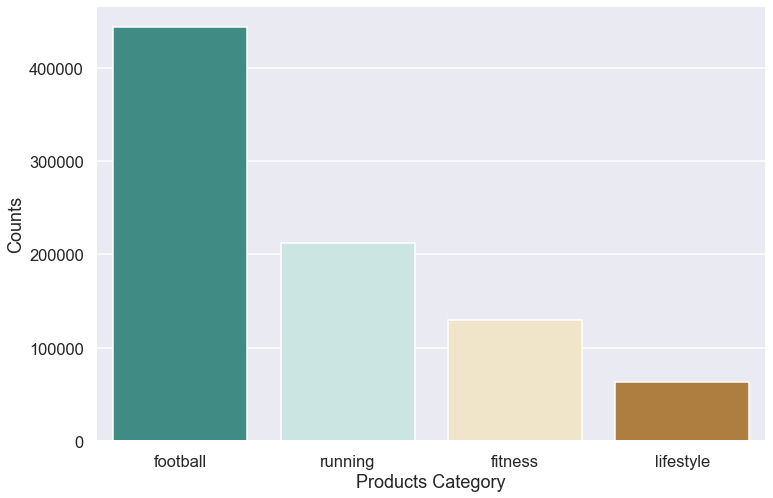

In [219]:
products_category=data['category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(products_category.index, products_category.values, palette='BrBG_r')
plt.ylabel('Counts')
plt.xlabel('Products Category')
plt.show()

In [210]:
# let's see how many manufactures the top4sport sales their products 
manufacturers=data.name.nunique()
print(f'There are {manufacturers} manufacturers that top4sport sales their products in the market.')

There are 93 manufacturers that top4sport sales their products in the market.


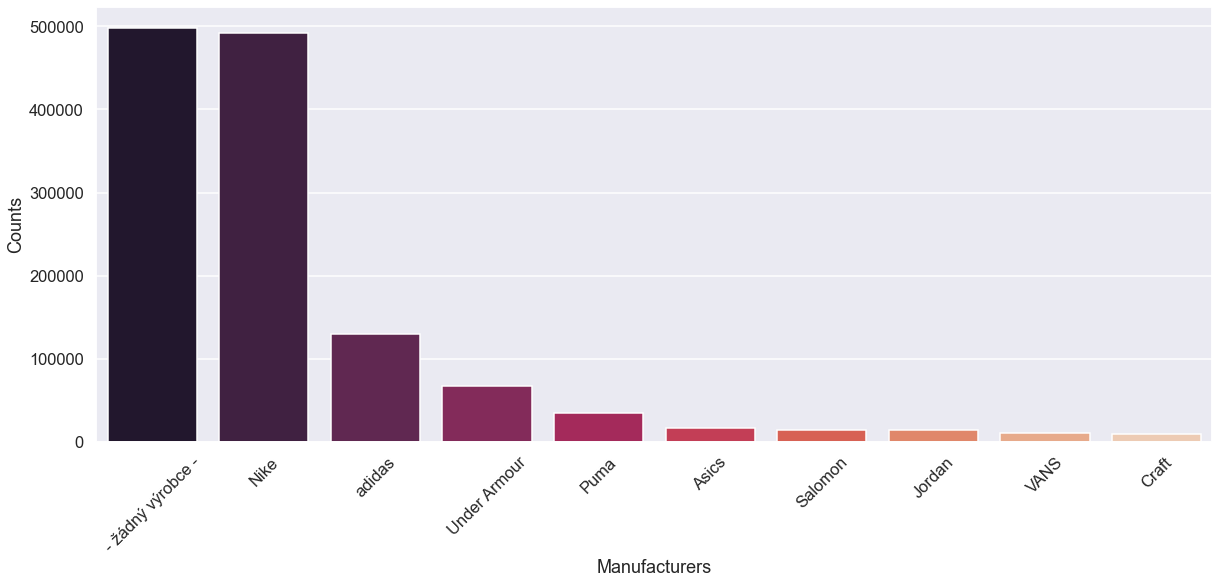

In [231]:
# Let's see the number of orders based on products manufacturers
product_manufacturers=data['name'].value_counts().head(10)
plt.figure(figsize=(20, 8))
sns.barplot(product_manufacturers.index, product_manufacturers.values, palette='rocket')
plt.ylabel('Counts')
plt.xlabel('Manufacturers')
plt.xticks(rotation=45)
plt.show()

In [213]:
data['group0'].value_counts()

Other        499251
Apparel      429844
Footwear     325211
Equipment     95732
Nutrition      1679
Services        144
Name: group0, dtype: int64

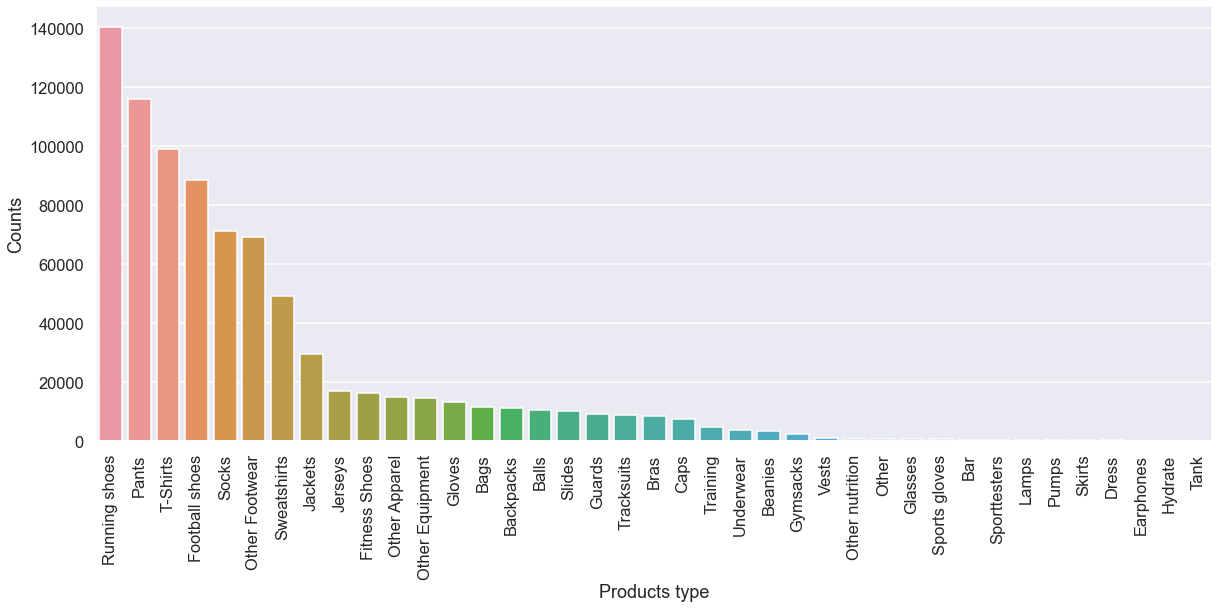

In [233]:
# Let's see which products are usually purchased by customers from top4sport
products=data['group1'].value_counts()
plt.figure(figsize=(20, 8))
sns.barplot(products.index, products.values)
plt.ylabel('Counts')
plt.xlabel('Products type')
plt.xticks(rotation=90)
plt.show()

In [173]:
# How many unique products the company has?
data.item_code.nunique()

161318

In [224]:
country=data['country'].value_counts()
print(country)

Czech Republic    498832
Slovakia          241654
Hungary           205115
Romania           173665
Germany            78604
Spain              71515
France             40640
Italy              18909
Croatia            16579
Austria             6348
Name: country, dtype: int64


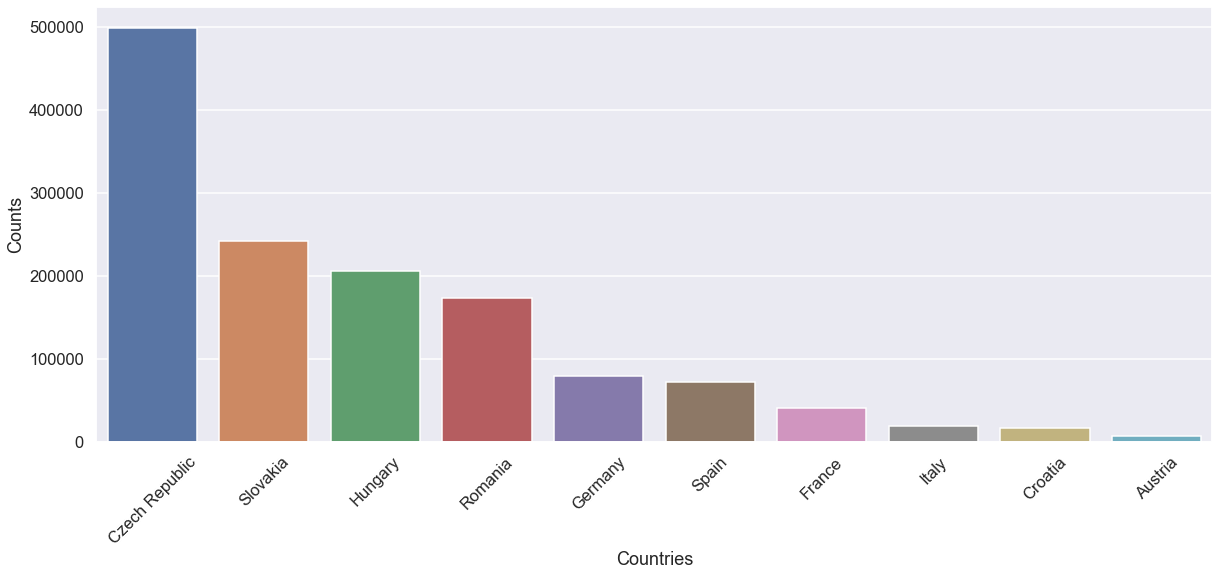

In [225]:
# Let's see the number of orders in different countries
country=data['country'].value_counts()
plt.figure(figsize=(20, 8))
sns.barplot(country.index, country.values)
plt.ylabel('Counts')
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.show()

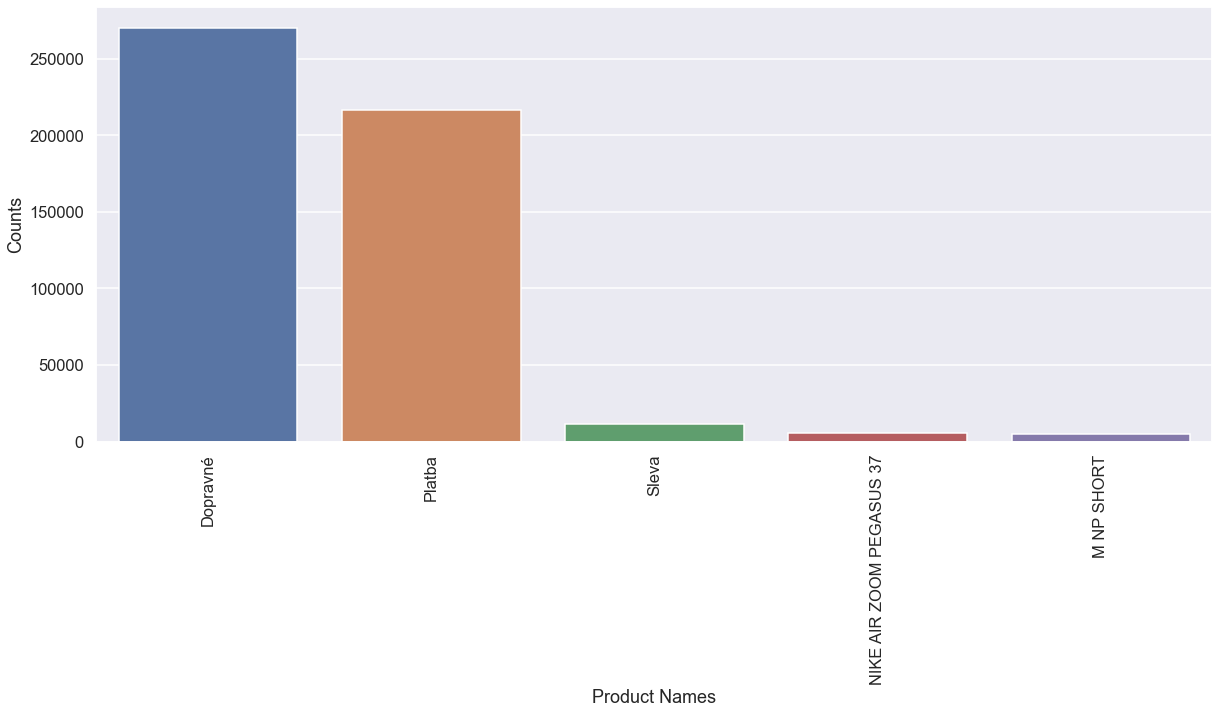

In [237]:
items_sales=data['item_name'].value_counts().head(5)
plt.figure(figsize=(20, 8))
sns.barplot(items_sales.index, items_sales.values)
plt.ylabel('Counts')
plt.xlabel('Product Names')
plt.xticks(rotation=90)
plt.show()


In [240]:
items_sales=data['item_name'].value_counts().head(5)
items_sales

Dopravné                    270384
Platba                      216558
Sleva                        11419
NIKE AIR ZOOM PEGASUS 37      5609
M NP SHORT                    5066
Name: item_name, dtype: int64

In [243]:
data['item_code'].value_counts()

S101          270119
S113          216558
S114           11419
ZB00077277      1259
ZB00088644      1137
               ...  
ZB00195118         1
ZB00028359         1
ZB00154532         1
ZB00145331         1
ZB00076540         1
Name: item_code, Length: 161318, dtype: int64

In [249]:
df=data[['item_code', 'quantity', 'item_name']].value_counts()

In [223]:
data.head()

,order_id,date,item_code,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue,country,item_name,style,name,group0,group1,category
0,1900052301,2019-06-04,ZB00025746,1,9.412096,0.000000,9.412096,0.000000,9.412096,Romania,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
1,1900100835,2019-07-15,ZB00025746,1,8.648837,5.393411,8.648837,5.393411,3.255426,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
2,1900106577,2019-07-24,ZB00025746,1,8.648837,5.458527,8.648837,5.458527,3.190310,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
3,1900111398,2019-08-01,ZB00025746,1,8.648837,5.440310,8.648837,5.440310,3.208527,Czech Republic,YTH LEAGUE KNIT SHORT NB,725990-010,Nike,Apparel,Pants,football
4,1900052301,2019-06-04,ZB00022010,1,12.784729,4.087597,12.784729,4.087597,8.697132,Romania,NK MERC LT GRD,sp2120-703,Nike,Equipment,Guards,football


In [250]:
df.head()

item_code   quantity  item_name              
S101         1        Dopravné                   270119
S113         1        Platba                     216556
S114        -1        Sleva                       11417
ZB00088644   1        M NK DRY PARK20 PANT KP      1102
ZB00077277   1        Nike Everyday 3 pack         1077
dtype: int64

In [251]:
# let's how much sales is correlates with revenues 
data.groupby(by=['order_id']).sum()

,quantity,unit_price_vat_excl,unit_cogs,net_revenue,gross_revenue,margin_revenue
order_id,,,,,,
1070007158,1,53.166667,52.093798,53.166667,52.093798,1.072868
1070065544,1,32.040310,10.930233,32.040310,10.930233,21.110077
1070126816,9,296.104263,296.912791,296.104263,296.912791,-0.808528
1070129993,1,48.818217,51.688760,48.818217,51.688760,-2.870543
1070131880,4,163.096511,160.635659,163.096511,160.635659,2.460852
...,...,...,...,...,...,...
2100190245,2,82.323337,77.023256,82.323337,77.023256,5.300081
2100190246,3,147.927519,104.637984,147.927519,104.637984,43.289535
2100190247,1,79.697674,42.868217,79.697674,42.868217,36.829457
